 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.
 

#### - by Indrajith Senevirathne 

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Set the file paths
whale_returns_data = Path("./Resources/whale_returns.csv")

# Read the CSVs to the dataframe
whale_returns_df = pd.read_csv(whale_returns_data)


In [3]:
# Count nulls

# set column names
whale_returns_df.columns = ["date", "soros_fund", "paulson_fund", "tiger_global_fund", "berkshire_fund"]

# set index for the whale_return_df 
whale_returns_df.set_index(pd.to_datetime(whale_returns_df["date"], infer_datetime_format=True), inplace=True)

# drop duplicate, non-index "date" column
whale_returns_df.drop(columns=["date"], inplace=True)

# check for null values in whale_returns_df
print(f"Number of null values in whale returns data:\n{whale_returns_df.isnull().sum()}\n")


Number of null values in whale returns data:
soros_fund           1
paulson_fund         1
tiger_global_fund    1
berkshire_fund       1
dtype: int64



In [4]:
# Drop nulls data from whale_returns_df 
# had null data to be removed
whale_returns_df.dropna(inplace = True)

# Check if the null values are removed 
print(f"Number of null values in whale returns data:\n{whale_returns_df.isnull().sum()}\n")


Number of null values in whale returns data:
soros_fund           0
paulson_fund         0
tiger_global_fund    0
berkshire_fund       0
dtype: int64



## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
# Set the file paths
algo_returns_data = Path("./Resources/algo_returns.csv")

# Read the CSVs to the dataframe
algo_returns_df = pd.read_csv(algo_returns_data)


In [6]:
# Count nulls

# Set column names
algo_returns_df.columns = ["date", "algo_1", "algo_2"]

# Set index for the algo_return_df 
algo_returns_df.set_index(pd.to_datetime(algo_returns_df["date"], infer_datetime_format=True), inplace=True)

# drop duplicate, non-index "date" column
algo_returns_df.drop(columns=["date"], inplace=True)

# Check for null values in whale_returns_df
print(f"Number of null values in algo data:\n{algo_returns_df.isnull().sum()}\n")


Number of null values in algo data:
algo_1    0
algo_2    6
dtype: int64



In [7]:
# Drop null data from algo_returns_df which 
# had null data to be removed
algo_returns_df.dropna(inplace = True)

# Check if the null values are removed 
print(f"Number of null values in algo data:\n{algo_returns_df.isnull().sum()}\n")


Number of null values in algo data:
algo_1    0
algo_2    0
dtype: int64



## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("./Resources/sp500_history.csv")

# Read the CSVs to the DataFrame
sp500_history_df = pd.read_csv(sp500_history_data)

# Set column names
sp500_history_df.columns = ["date", "sp500"]

# Set index for the sp500_history_df 
sp500_history_df.set_index(pd.to_datetime(sp500_history_df["date"], infer_datetime_format=True), inplace=True)

# Changing the order to ascending on date 
sp500_history_df.sort_index(inplace = True, ascending = True)

# drop duplicate, non-index "date" column
sp500_history_df.drop(columns=["date"], inplace=True)

print(sp500_history_df.head(3))


               sp500
date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99


In [9]:
# Check Data Types

# Check data types of the DataFrame
print(f"{sp500_history_df.dtypes} \n")

# Check first 3 rows of the DataFrame
print(sp500_history_df.head(3))


sp500    object
dtype: object 

               sp500
date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99


In [10]:
# This function will remove dollar sign from a string containing numbers 
# and $ character and then returns the string with numbers  
def clean_dollar_sign(value):
    """ removes the $ sign from the currency to be converted to float     """
    if isinstance(value, str):
        return(value.replace("$", " "))
    return(value)


In [11]:
# Remove the $ of the closing values via calling the function clean_dollar_sign and 
# change type to float  
sp500_history_df["sp500"] = sp500_history_df["sp500"].apply(clean_dollar_sign).astype("float")

print(sp500_history_df.head(3))

              sp500
date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99


In [12]:
# Calculate Daily Returns
# calculating returns for sp500_history_df
sp500_returns_df = sp500_history_df.pct_change()
print(sp500_returns_df.head(3))


               sp500
date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624


In [13]:
# Drop nulls
# check for null values 
print(f"Number of null values in sp500_returns data data:\n{sp500_returns_df.isnull().sum()}\n")

# Dropping the null data from sp500_returns_df which 
# has null data to be removed
sp500_returns_df.dropna(inplace = True)

# Check for null values 
print(f"After removing null values number of null \nvalues in sp500_returns data:\n{sp500_returns_df.isnull().sum()}\n")

print(sp500_returns_df.head(3))


Number of null values in sp500_returns data data:
sp500    1
dtype: int64

After removing null values number of null 
values in sp500_returns data:
sp500    0
dtype: int64

               sp500
date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([sp500_returns_df, whale_returns_df, algo_returns_df], axis="columns", join="inner")

print(combined_returns_df.head(3))


               sp500  soros_fund  paulson_fund  tiger_global_fund  \
date                                                                
2015-03-03 -0.004539   -0.001266     -0.004981          -0.000496   
2015-03-04 -0.004389    0.002230      0.003241          -0.002534   
2015-03-05  0.001196    0.004016      0.004076           0.002355   

            berkshire_fund    algo_1    algo_2  
date                                            
2015-03-03       -0.006569 -0.001942 -0.000949  
2015-03-04        0.004213 -0.008589  0.002416  
2015-03-05        0.006726 -0.000955  0.004323  


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for Whales, Algo Traders, and S&P 500\n'}, xlabel='\nDate', ylabel='Daily Returns'>

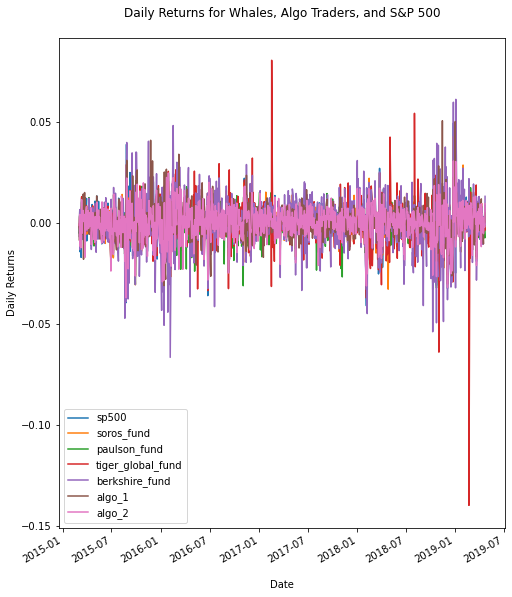

In [15]:
# Plot daily returns of all portfolios
combined_returns_df.plot(xlabel = "\nDate", ylabel = "Daily Returns", figsize = (8,10), title = "Daily Returns for Whales, Algo Traders, and S&P 500\n")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for Whales, Algo Traders, and S&P 500\n'}, xlabel='\nDate', ylabel='Cumulative Returns'>

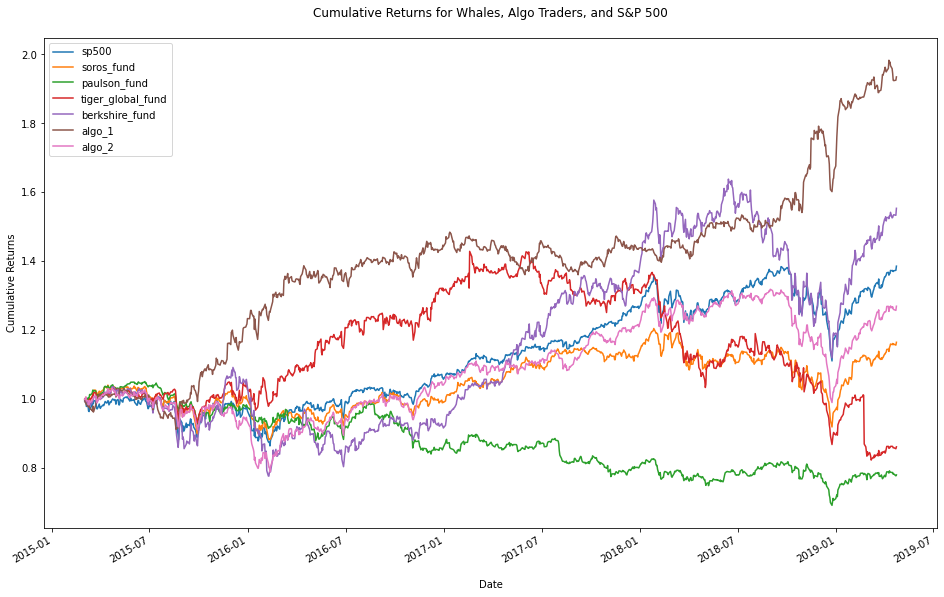

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = ( 1 + combined_returns_df).cumprod()

# Plot cumulative returns
cumulative_returns_df.plot(xlabel = "\nDate", ylabel = "Cumulative Returns", figsize = (16,10), title = "Cumulative Returns for Whales, Algo Traders, and S&P 500\n")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Portfolio Statistics\n')

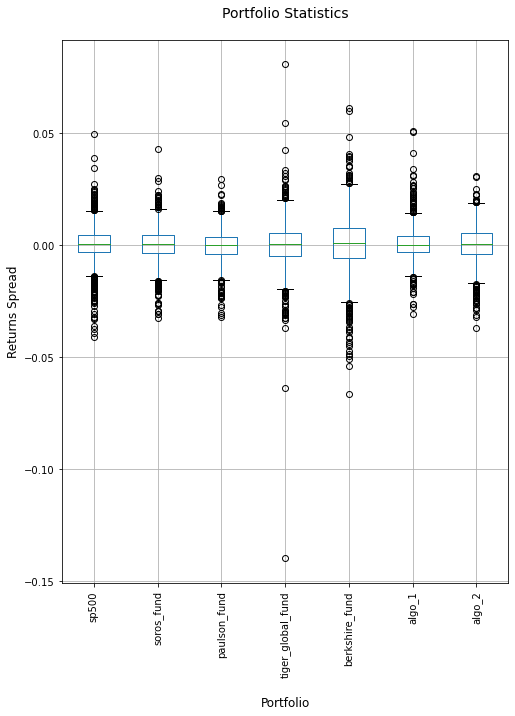

In [17]:
# Box plot to visually show risk
porfolio_column = ["sp500", "soros_fund", "paulson_fund", "tiger_global_fund", "berkshire_fund", "algo_1", "algo_2"]

ax = combined_returns_df.boxplot(column = porfolio_column, fontsize = 10, figsize = (8,10), rot=90)

ax.set_ylabel("Returns Spread", fontsize = 12)
ax.set_xlabel("\nPortfolio", fontsize = 12)
ax.set_title("Portfolio Statistics\n", fontsize = 14)


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_returns_df.std()
#volatility
print(f"Volatality/Risk of the Portfolio: \n\n{round(volatility, 7)}")


Volatality/Risk of the Portfolio: 

sp500                0.008554
soros_fund           0.007895
paulson_fund         0.007023
tiger_global_fund    0.010894
berkshire_fund       0.012919
algo_1               0.007620
algo_2               0.008342
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
volatility_sp500 = volatility[0]
volatility_soros_fund = volatility[1]
volatility_paulson_fund = volatility[2]
volatility_tiger_global_fund = volatility[3]
volatility_berkshire_fund = volatility[4]
volatility_algo_1 = volatility[5]
volatility_algo_2 = volatility[6]

print (f"Volatility/risk of the S&P 500: {round(volatility_sp500, 7)}")
print (f"Volatility/risk of the Soros Fund: {round(volatility_soros_fund, 7)}")
print (f"Volatility/risk of the Paulson Fund: {round(volatility_soros_fund, 7)}")
print (f"Volatility/risk of the Tiger Global Fund: {round(volatility_tiger_global_fund, 7)}")
print (f"Volatility/risk of the Berkshire Fund: {round(volatility_berkshire_fund, 7)}")
print (f"Volatility/risk of the Algo 1: {round(volatility_algo_1, 7)}")
print (f"Volatility/risk of the Algo 2: {round(volatility_algo_2, 7)}\n")

# Determine which portfolios are riskier than the S&P 500
print (f"Considering volatility Tiger Global Fund, and Berkshire Fund have higher Risk than S&P 500")

Volatility/risk of the S&P 500: 0.0085537
Volatility/risk of the Soros Fund: 0.0078954
Volatility/risk of the Paulson Fund: 0.0078954
Volatility/risk of the Tiger Global Fund: 0.010894
Volatility/risk of the Berkshire Fund: 0.0129186
Volatility/risk of the Algo 1: 0.0076202
Volatility/risk of the Algo 2: 0.0083423

Considering volatility Tiger Global Fund, and Berkshire Fund have higher Risk than S&P 500


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
volatility_annual = combined_returns_df.std() * np.sqrt(252)

volatility_annual_sp500 = volatility_annual[0]
volatility_annual_soros_fund = volatility_annual[1]
volatility_annual_paulson_fund = volatility_annual[2]
volatility_annual_tiger_global_fund = volatility_annual[3]
volatility_annual_berkshire_fund = volatility_annual[4]
volatility_annual_algo_1 = volatility_annual[5]
volatility_annual_algo_2 = volatility_annual[6]

print (f"Annual volatility/risk of the S&P 500: {volatility_annual_sp500}")
print (f"Annual volatility/risk of the Soros Fund: {volatility_annual_soros_fund}")
print (f"Annual volatility/risk of the Paulson Fund: {volatility_annual_soros_fund}")
print (f"Annual volatility/risk of the Tiger Global Fund: {volatility_annual_tiger_global_fund}")
print (f"Annual volatility/risk of the Berkshire Fund: {volatility_annual_berkshire_fund}")
print (f"Annual volatility/risk of the Algo 1: {volatility_annual_algo_1}")
print (f"Annual volatility/risk of the Algo 2: {volatility_annual_algo_2}\n")


Annual volatility/risk of the S&P 500: 0.1357862795355803
Annual volatility/risk of the Soros Fund: 0.1253351427244245
Annual volatility/risk of the Paulson Fund: 0.1253351427244245
Annual volatility/risk of the Tiger Global Fund: 0.17293640640892274
Annual volatility/risk of the Berkshire Fund: 0.20507671007853867
Annual volatility/risk of the Algo 1: 0.12096695606000317
Annual volatility/risk of the Algo 2: 0.13242950377657475



---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD for Whales, Algo Traders, and S&P 500'}, xlabel='Date', ylabel='21 Day Rolling STD'>

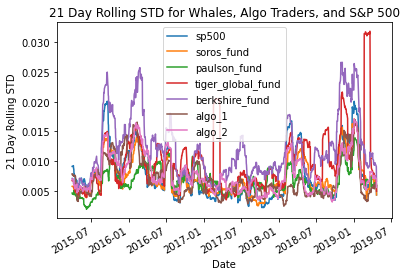

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(xlabel = "Date", ylabel = "21 Day Rolling STD", title = "21 Day Rolling STD for Whales, Algo Traders, and S&P 500")


### Calculate and plot the correlation

Correlation of Whales, Algo, and S&P 500 Portfolio
                       sp500  soros_fund  paulson_fund  tiger_global_fund  \
sp500              1.000000    0.837864      0.669732           0.623946   
soros_fund         0.837864    1.000000      0.699914           0.561243   
paulson_fund       0.669732    0.699914      1.000000           0.434479   
tiger_global_fund  0.623946    0.561243      0.434479           1.000000   
berkshire_fund     0.751371    0.754360      0.545623           0.424423   
algo_1             0.279494    0.321211      0.268840           0.164387   
algo_2             0.858764    0.826873      0.678152           0.507414   

                   berkshire_fund    algo_1    algo_2  
sp500                    0.751371  0.279494  0.858764  
soros_fund               0.754360  0.321211  0.826873  
paulson_fund             0.545623  0.268840  0.678152  
tiger_global_fund        0.424423  0.164387  0.507414  
berkshire_fund           1.000000  0.292033  0.688082  
alg

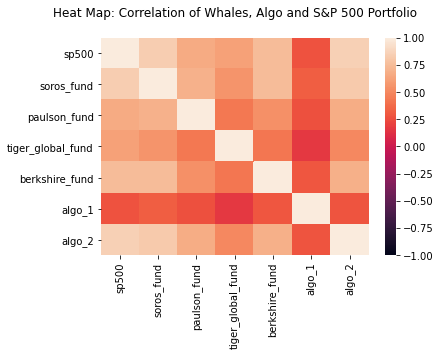

In [22]:
# Calculate the correlation

# Use the `corr` function to calculate the correlation between portfolio returns
correlation = combined_returns_df.corr()

# Display de correlation matrix
print(f"Correlation of Whales, Algo, and S&P 500 Portfolio\n {correlation} \n")

# Use the `heatmap` function from the Seaborn library to visualize correlations
ax = plt.axes()
sns.heatmap(correlation, ax = ax, vmin=-1, vmax=1)
ax.set_title('Heat Map: Correlation of Whales, Algo and S&P 500 Portfolio\n')
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance of Soros Fund: 6e-05
Covariance of Paulson Fund: 4e-05
Covariance of Tiger Global Fund: 6e-05
Covariance of Berkshire Fund: 8e-05
Covariance of Algo 1: 2e-05
Covariance of Algo 2: 6e-05

Variance of S&P 500: 0.02087

Beta of Soros Fund: 0.00271
Beta of Paulson Fund: 0.00193
Beta of Tiger Global Fund: 0.00279
Beta of Berkshire Fund: 0.00398
Beta of Algo 1: 0.00087
Beta of Algo 2: 0.00294



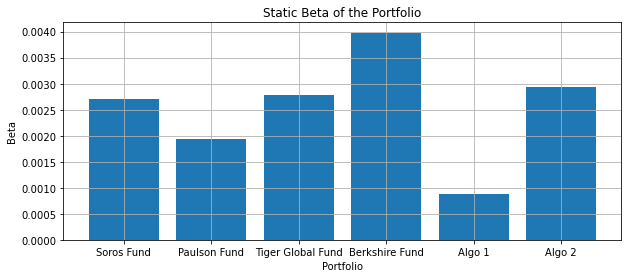

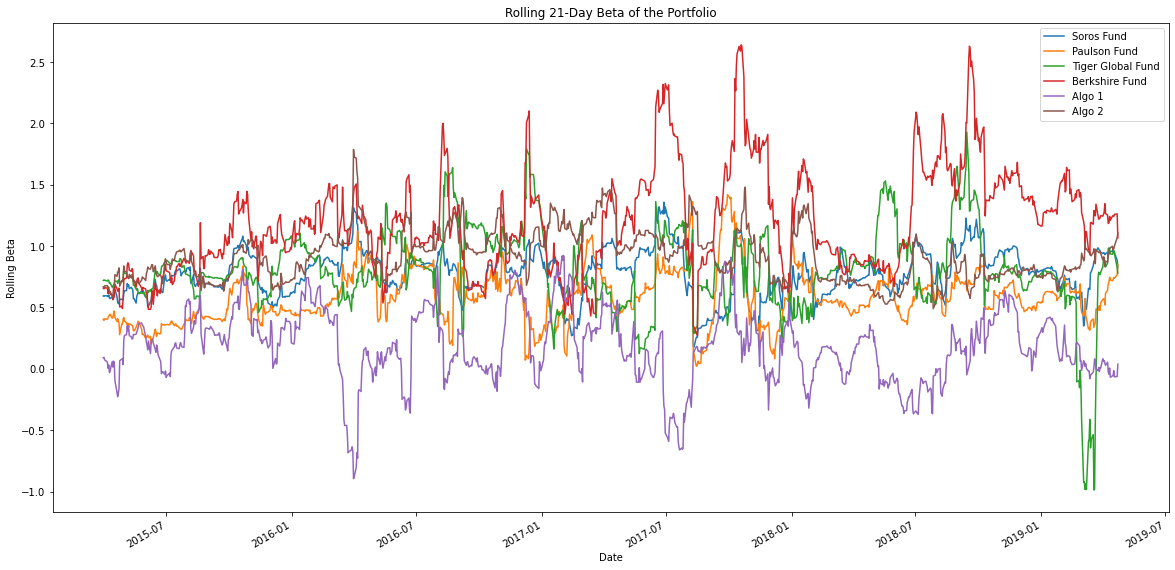

In [23]:
# Calculating Beta for Static (for the entire data set) and Rolling (21-day) for each portfolio

# Calculate covariance of all daily returns of portfolios vs. S&P 500
covariance_soros_fund = combined_returns_df['soros_fund'].cov(combined_returns_df['sp500'])
covariance_paulson_fund = combined_returns_df['paulson_fund'].cov(combined_returns_df['sp500'])
covariance_tiger_global_fund = combined_returns_df['tiger_global_fund'].cov(combined_returns_df['sp500'])
covariance_berkshire_fund = combined_returns_df['berkshire_fund'].cov(combined_returns_df['sp500'])
covariance_algo_1 = combined_returns_df['algo_1'].cov(combined_returns_df['sp500'])
covariance_algo_2 = combined_returns_df['algo_2'].cov(combined_returns_df['sp500'])

print(f"Covariance of Soros Fund: {round(covariance_soros_fund, 5)}")
print(f"Covariance of Paulson Fund: {round(covariance_paulson_fund, 5)}")
print(f"Covariance of Tiger Global Fund: {round(covariance_tiger_global_fund, 5)}")
print(f"Covariance of Berkshire Fund: {round(covariance_berkshire_fund, 5)}")
print(f"Covariance of Algo 1: {round(covariance_algo_1, 5)}")
print(f"Covariance of Algo 2: {round(covariance_algo_2, 5)}\n")

# Calculate variance of S&P 500
variance = cumulative_returns_df['sp500'].var()
print(f"Variance of S&P 500: {round(variance, 5)}\n")

# Computing beta

# Calculate beta of all portfolio returns
beta_soros_fund = covariance_soros_fund / variance
beta_paulson_fund = covariance_paulson_fund / variance
beta_tiger_global_fund = covariance_tiger_global_fund / variance
beta_berkshire_fund = covariance_berkshire_fund / variance
beta_algo_1 = covariance_algo_1 / variance
beta_algo_2 = covariance_algo_2 / variance

print(f"Beta of Soros Fund: {round(beta_soros_fund, 5)}")
print(f"Beta of Paulson Fund: {round(beta_paulson_fund, 5)}")
print(f"Beta of Tiger Global Fund: {round(beta_tiger_global_fund, 5)}")
print(f"Beta of Berkshire Fund: {round(beta_berkshire_fund, 5)}")
print(f"Beta of Algo 1: {round(beta_algo_1, 5)}")
print(f"Beta of Algo 2: {round(beta_algo_2, 5)}\n")

# Plot Static Beta for the entire data set
portfolio = ["Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Fund", "Algo 1", "Algo 2"]
beta = [beta_soros_fund, beta_paulson_fund, beta_tiger_global_fund, beta_berkshire_fund, beta_algo_1, beta_algo_2]
    
plt.figure(figsize = (10, 4))
plt.bar(portfolio, beta)
plt.xlabel("Portfolio")
plt.ylabel("Beta")
plt.grid()
plt.title("Static Beta of the Portfolio")
plt.show()


# Calculating Rolling Beta for each portfolio

# Calculating Rolling Covariance

# Calculate 21-day rolling covariance of the portfolio vs. S&P 500 
rolling_covariance_soros_fund = combined_returns_df['soros_fund'].rolling(window=21).cov(combined_returns_df['sp500'])
rolling_covariance_paulson_fund = combined_returns_df['paulson_fund'].rolling(window=21).cov(combined_returns_df['sp500'])
rolling_covariance_tiger_global_fund = combined_returns_df['tiger_global_fund'].rolling(window=21).cov(combined_returns_df['sp500'])
rolling_covariance_berkshire_fund = combined_returns_df['berkshire_fund'].rolling(window=21).cov(combined_returns_df['sp500'])
rolling_covariance_algo_1 = combined_returns_df['algo_1'].rolling(window=21).cov(combined_returns_df['sp500'])
rolling_covariance_algo_2 = combined_returns_df['algo_2'].rolling(window=21).cov(combined_returns_df['sp500'])

# Calculate 21-day rolling variance of AMZN vs. S&P 500 and plot the data
rolling_variance_sp500 = combined_returns_df['sp500'].rolling(window=21).var()

# Calculate 21-day rolling beta of portfolio
rolling_beta_soros_fund = rolling_covariance_soros_fund / rolling_variance_sp500
rolling_beta_paulson_fund = rolling_covariance_paulson_fund / rolling_variance_sp500
rolling_beta_tiger_global_fund = rolling_covariance_tiger_global_fund / rolling_variance_sp500
rolling_beta_berkshire_fund = rolling_covariance_berkshire_fund / rolling_variance_sp500
rolling_beta_algo_1 = rolling_covariance_algo_1 / rolling_variance_sp500
rolling_beta_algo_2 = rolling_covariance_algo_2 / rolling_variance_sp500

# Set the figure of the chart and plot each beta trend on the single figure
ax = rolling_beta_soros_fund.plot(figsize=(20,10))
rolling_beta_paulson_fund.plot(ax=ax)
rolling_beta_tiger_global_fund.plot(ax=ax)
rolling_beta_berkshire_fund.plot(ax=ax)
rolling_beta_algo_1.plot(ax=ax)
rolling_beta_algo_2.plot(ax=ax)

ax.set_ylabel("Rolling Beta")
ax.set_xlabel("Date")
ax.set_title("Rolling 21-Day Beta of the Portfolio")

ax.legend(['Soros Fund', 
           'Paulson Fund', 
           'Tiger Global Fund', 
           'Berkshire Fund', 
           'Algo 1', 'Algo 2'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
print(f"Sharpe Ratio's of the Portfolio :\n\n{sharpe_ratios}")

Sharpe Ratio's of the Portfolio :

sp500                0.648267
soros_fund           0.356417
paulson_fund        -0.483570
tiger_global_fund   -0.121060
berkshire_fund       0.621810
algo_1               1.378648
algo_2               0.501364
dtype: float64


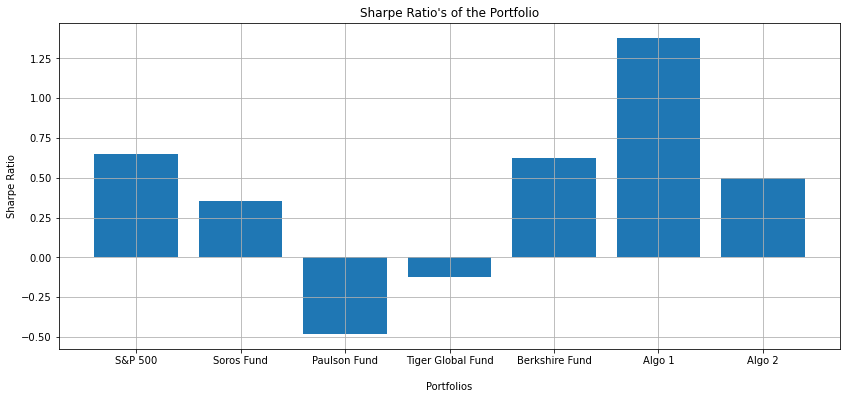

In [26]:
# Visualize the sharpe ratios as a bar plot
portfolio = ["S&P 500", "Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Fund", "Algo 1", "Algo 2"]
beta = [sharpe_ratios[0], sharpe_ratios[1], sharpe_ratios[2], sharpe_ratios[3], sharpe_ratios[4], sharpe_ratios[5], sharpe_ratios[6]]
        
plt.figure(figsize = (14, 6))
plt.bar(portfolio, beta)
plt.grid()
plt.xlabel("\nPortfolios")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio's of the Portfolio")
plt.show()


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

#### Returns
Considering the cumulative returns, Algo 1 Fund is by far superior.  The Cumulative Returns graph evidences this. Berkshire Fund is behind it but ranks second while Paulson Fund does the worst, with Tiger Global Fund is a close second-worst fund in this basket of portfolios. Overall return spread comparable to each other in an absolute sense relative to each other. This can be seen by the Boxplot figure.  

#### Risk Considerations
When looking at the collection of portfolios, most of them are highly exposed to the market, i.e., bear significant systematic risk.  This is evidenced by lighter shade in the S&P 500 column in the Heat Map and relatively higher values in the S&P 500 column in the Correlation Matrix, which shows a high correlation with S&P 500.  The highest correlation is for Soros Fund (0.84), while the lowest is for Algo 1 Fund (0.28).  When looking at the overall Beta, the highest Beta is for Berkshire Fund, indicating strong performance in a bull market but likely fair badly in a bear market. In contrast, Algo 1 Fund shows significant stability compared to the market relative to all others.  Beta for Algo 2 Fund is comparable to that of Soros Fund and Tiger Global Fund. When observing 21-day rolling Beta, it is possible to see confirmation of that.  It is possible to observe significant fluctuations for Beta for Berkshire and Tiger Global Funds (while keeping a relatively high Beta overall), and Algo 1 Fund has a high fluctuation overall the Beta value is smaller. 

#### Overall
Finally, observing the Sharpe Ratio, the Algo 1 Fund gives the best returns adjusted to risk while Paulson Fund does the worst in this aspect. The best fund/portfolio overall is the Algo 1 Fund due to its high cumulative returns, low Beta, and high Sharpe Ratio. The worst performers are Paulson and Tiger global again due to low cumulative returns, high Beta, and low Sharpe Ratios.    
  
Although Algo 1 did very well Algo 2 is comparable to Whale Portfolios. Then it can be said on average (having considered only a handfull of funds in this analysis) that Algo Trading Portfolios do better or comparable to the Whale Portfolios. When fees are considered (charged by Whale/Hedge/Equity funds) this could be be a substantially favorable to Algo Trading Portfolios, which ideally should charge much less fees.     
  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [27]:
# Reading data from 1st stock
# Set the file paths
aapl_historical_data = Path("./Resources/aapl_historical.csv")

# Read the CSVs to the DataFrame
aapl_historical_df = pd.read_csv(aapl_historical_data)


# Set column names
aapl_historical_df.columns = ["symbol", "date", "aapl"]

# set index for the whale_return_df 
aapl_historical_df.set_index(pd.to_datetime(aapl_historical_df["date"], infer_datetime_format=True), inplace=True)

# drop duplicate, non-index "date" & "symbol" columns
aapl_historical_df.drop(columns=["symbol", "date"], inplace=True)

# Changing the order to ascending on date 
aapl_historical_df.sort_index(inplace = True, ascending = True)

# Check for null values in aapl_historical_df
print(f"Number of null values in AAPL historical data:\n{aapl_historical_df.isnull().sum()}\n")
print(aapl_historical_df.head(3))

Number of null values in AAPL historical data:
aapl    0
dtype: int64

              aapl
date              
2018-05-11  188.59
2018-05-14  188.15
2018-05-15  186.44


In [28]:
# Reading data from 2nd stock
# Set the file paths
cost_historical_data = Path("./Resources/cost_historical.csv")

# Read the CSVs to the DataFrame
cost_historical_df = pd.read_csv(cost_historical_data)

# Set column names
cost_historical_df.columns = ["symbol", "date", "cost"]

# set index for the whale_return_df 
cost_historical_df.set_index(pd.to_datetime(cost_historical_df["date"], infer_datetime_format=True), inplace=True)

# drop duplicate, non-index "date" & "symbol" columns
cost_historical_df.drop(columns=["symbol", "date"], inplace=True)

# Changing the order to ascending on date 
cost_historical_df.sort_index(inplace = True, ascending = True)

# Check for null values in aapl_historical_df
print(f"Number of null values in COST historical data:\n{cost_historical_df.isnull().sum()}\n")
print(cost_historical_df.head(3))

Number of null values in COST historical data:
cost    0
dtype: int64

              cost
date              
2018-05-11  195.76
2018-05-14  195.88
2018-05-15  195.48


In [29]:
# Reading data from 3rd stock
# Set the file paths
goog_historical_data = Path("./Resources/goog_historical.csv")

# Read the CSVs to the DataFrame
goog_historical_df = pd.read_csv(goog_historical_data)

# Set column names
goog_historical_df.columns = ["symbol", "date", "goog"]

# set index for the whale_return_df 
goog_historical_df.set_index(pd.to_datetime(goog_historical_df["date"], infer_datetime_format=True), inplace=True)

# drop duplicate, non-index "date" & "symbol" columns
goog_historical_df.drop(columns=["symbol", "date"], inplace=True)

# Changing the order to ascending on date 
goog_historical_df.sort_index(inplace = True, ascending = True)

# Check for null values in aapl_historical_df
print(f"Number of null values in GOOG historical data:\n{goog_historical_df.isnull().sum()}\n")
print(goog_historical_df.head(3))

Number of null values in GOOG historical data:
goog    0
dtype: int64

               goog
date               
2018-05-11  1098.26
2018-05-14  1100.20
2018-05-15  1079.23


In [30]:
# Combine all stocks in a single DataFrame
# Join AAPL, COST, and the GOOG historical into a single DataFrame with columns for each equity closing
select_equity_historical_df = pd.concat([aapl_historical_df, cost_historical_df, goog_historical_df], axis="columns", join="inner")

print(select_equity_historical_df.head(3))

              aapl    cost     goog
date                               
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23


In [31]:
# Reset Date index
print("Date index is already reset!")

Date index is already reset!


In [32]:
# Reorganize portfolio data by having a column per symbol
print("Columns have ticker symbols already!")

Columns have ticker symbols already!


In [33]:
# Calculate daily returns
select_equity_returns_df = select_equity_historical_df.pct_change()


# Check for null values in aapl_historical_df
print(f"Number of null values in Select Equity Returns data:\n{select_equity_returns_df.isnull().sum()}\n")

print(f"Select Equity Returns:\n{select_equity_returns_df.head(3)}\n")


# Drop NAs
select_equity_returns_df.dropna(inplace = True)

# Display sample data
# Check for null values in aapl_historical_df
print(f"Number of null values in Select Equity Returns data:\n{select_equity_returns_df.isnull().sum()}\n")
print(f"Select Equity Returns:\n {select_equity_returns_df.head(3)}\n")

Number of null values in Select Equity Returns data:
aapl    1
cost    1
goog    1
dtype: int64

Select Equity Returns:
                aapl      cost      goog
date                                    
2018-05-11       NaN       NaN       NaN
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060

Number of null values in Select Equity Returns data:
aapl    0
cost    0
goog    0
dtype: int64

Select Equity Returns:
                 aapl      cost      goog
date                                    
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354



## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return in series
select_portfolio_returns_se = select_equity_returns_df.dot(weights)

# Display sample data
print(f"Select Portfolio Returns:\n {select_portfolio_returns_se.head(3)}\n")


Select Portfolio Returns:
 date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
dtype: float64



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
select_combined_returns_df = pd.concat([select_portfolio_returns_se, combined_returns_df], axis="columns", join="inner")

select_combined_returns_df.columns = ["select", "sp500", "soros_fund", "paulson_fund", "tiger_global_fund", "berkshire_fund", "algo_1", "algo_2"] 

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
print(f"Select added to previous Combined Returns HEAD:\n {select_combined_returns_df.head(3)}\n")
print(f"Select added to previous Combined Returns TAIL:\n {select_combined_returns_df.tail(3)}\n")
print(f"Total number of NaN in DataFrame:\n {select_combined_returns_df.isnull().sum().sum()}\n")
print(f"No correction needed.")


Select added to previous Combined Returns HEAD:
               select     sp500  soros_fund  paulson_fund  tiger_global_fund  \
date                                                                          
2018-05-14  0.000015  0.000884    0.000000      0.000000           0.000000   
2018-05-15 -0.010064 -0.006842   -0.000726     -0.001409          -0.003189   
2018-05-16  0.009403  0.004061    0.008637      0.006244           0.005480   

            berkshire_fund    algo_1    algo_2  
date                                            
2018-05-14        0.000000  0.000915  0.001635  
2018-05-15       -0.014606 -0.001135 -0.001139  
2018-05-16        0.004310 -0.002326  0.003341  

Select added to previous Combined Returns TAIL:
               select     sp500  soros_fund  paulson_fund  tiger_global_fund  \
date                                                                          
2019-04-18  0.001545  0.001579    0.001448      0.001222           0.000582   
2019-04-22  0.001217  0

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`

# Calculate the annualized standard deviation (252 trading days)
volatility_annual = select_combined_returns_df.std() * np.sqrt(252)

volatility_annual_select = volatility_annual[0]
volatility_annual_sp500 = volatility_annual[1]
volatility_annual_soros_fund = volatility_annual[2]
volatility_annual_paulson_fund = volatility_annual[3]
volatility_annual_tiger_global_fund = volatility_annual[4]
volatility_annual_berkshire_fund = volatility_annual[5]
volatility_annual_algo_1 = volatility_annual[6]
volatility_annual_algo_2 = volatility_annual[7]

print (f"Annual volatility/risk of Select: {volatility_annual_select}")
print (f"Annual volatility/risk of S&P 500: {volatility_annual_sp500}")
print (f"Annual volatility/risk of Soros Fund: {volatility_annual_soros_fund}")
print (f"Annual volatility/risk of Paulson Fund: {volatility_annual_soros_fund}")
print (f"Annual volatility/risk of Tiger Global Fund: {volatility_annual_tiger_global_fund}")
print (f"Annual volatility/risk of Berkshire Fund: {volatility_annual_berkshire_fund}")
print (f"Annual volatility/risk of Algo 1 Fund: {volatility_annual_algo_1}")
print (f"Annual volatility/risk of Algo 2 Fund: {volatility_annual_algo_2}\n")


Annual volatility/risk of Select: 0.21149550884465998
Annual volatility/risk of S&P 500: 0.15205391342129804
Annual volatility/risk of Soros Fund: 0.1466752232704427
Annual volatility/risk of Paulson Fund: 0.1466752232704427
Annual volatility/risk of Tiger Global Fund: 0.23253098791242272
Annual volatility/risk of Berkshire Fund: 0.247154519859636
Annual volatility/risk of Algo 1 Fund: 0.13370379015428183
Annual volatility/risk of Algo 2 Fund: 0.13955634264207645



### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD for Select, Whales, Algo Traders, and S&P 500'}, xlabel='Date', ylabel='21 Day Rolling STD'>

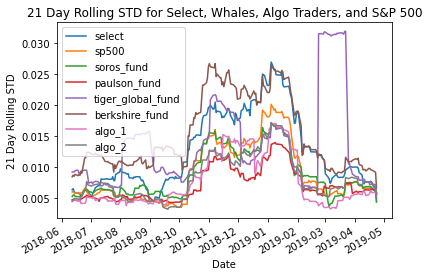

In [38]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
days21_rolling_STD_select_combined_returns_df = select_combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
days21_rolling_STD_select_combined_returns_df.plot(xlabel = "Date", ylabel = "21 Day Rolling STD", title = "21 Day Rolling STD for Select, Whales, Algo Traders, and S&P 500")

### Calculate and plot the correlation

Correlation of Select, Whales, and S&P 500 Portfolio
                      select     sp500  soros_fund  paulson_fund  \
select             1.000000  0.871875    0.733250      0.644210   
sp500              0.871875  1.000000    0.876981      0.766680   
soros_fund         0.733250  0.876981    1.000000      0.791962   
paulson_fund       0.644210  0.766680    0.791962      1.000000   
tiger_global_fund  0.391972  0.481030    0.478627      0.485375   
berkshire_fund     0.801158  0.852303    0.816675      0.650758   
algo_1             0.261471  0.289358    0.337826      0.361301   
algo_2             0.739936  0.875721    0.862846      0.783656   

                   tiger_global_fund  berkshire_fund    algo_1    algo_2  
select                      0.391972        0.801158  0.261471  0.739936  
sp500                       0.481030        0.852303  0.289358  0.875721  
soros_fund                  0.478627        0.816675  0.337826  0.862846  
paulson_fund                0.485375      

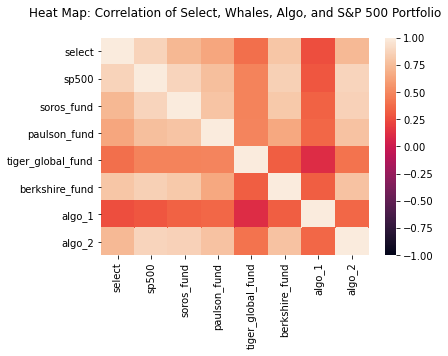

In [39]:
# Calculate and plot the correlation
# Calculate the correlation

# Use the `corr` function to calculate the correlation between portfolio returns
select_correlation = select_combined_returns_df.corr()

# Display de correlation matrix
print(f"Correlation of Select, Whales, and S&P 500 Portfolio\n {select_correlation} \n")

# Use the `heatmap` function from the Seaborn library to visualize correlations
ax = plt.axes()
sns.heatmap(select_correlation, ax = ax, vmin=-1, vmax=1)
ax.set_title('Heat Map: Correlation of Select, Whales, Algo, and S&P 500 Portfolio\n')
plt.show()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Covariance of the Select Fund: 0.00011
Covariance of the Soros Fund: 8e-05
Covariance of the Paulson Fund: 5e-05
Covariance of the Tiger Global Fund: 7e-05
Covariance of the Berkshire Fund: 0.00013
Covariance of the Algo 1: 2e-05
Covariance of the Algo 2: 7e-05

Variance of S&P 500: 0.02087

Beta of Select Fund: 1.21271
Beta of Soros Fund: 0.84596
Beta of Paulson Fund: 0.58858
Beta of Tiger Global Fund: 0.73562
Beta of Berkshire Fund: 1.38537
Beta of Algo 1: 0.25444
Beta of Algo 2: 0.80374



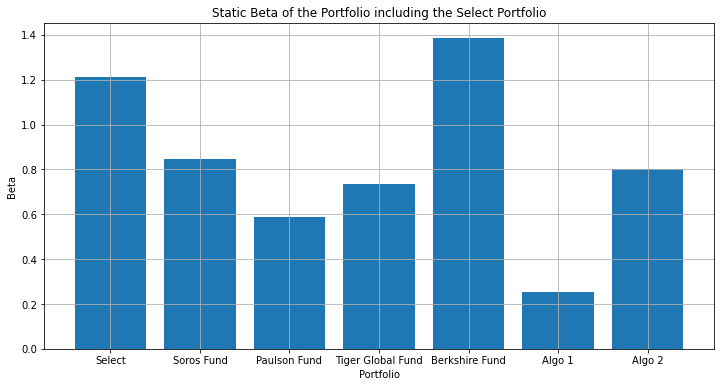

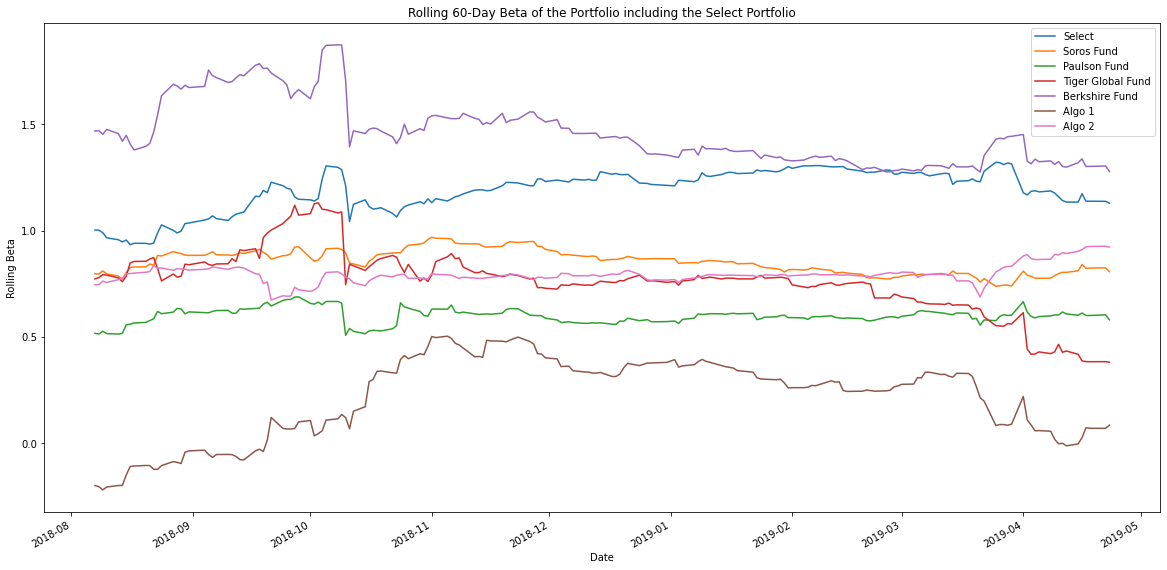

In [40]:
# Calculate and plot Beta both Static (for the entire dataset) and Rolling (60-day)
#(sample size has changed due to the date range-
# -change (now at 2018-2019) from the previous the data set (then it was at 2015-2019). Therefore parameters needs a recalculation)

# Calculate covariance of Select Portfolio Returns vs. S&P 500 
select_covariance_select_fund = select_combined_returns_df['select'].cov(select_combined_returns_df['sp500'])
select_covariance_soros_fund = select_combined_returns_df['soros_fund'].cov(select_combined_returns_df['sp500'])
select_covariance_paulson_fund = select_combined_returns_df['paulson_fund'].cov(select_combined_returns_df['sp500'])
select_covariance_tiger_global_fund = select_combined_returns_df['tiger_global_fund'].cov(select_combined_returns_df['sp500'])
select_covariance_berkshire_fund = select_combined_returns_df['berkshire_fund'].cov(select_combined_returns_df['sp500'])
select_covariance_algo_1 = select_combined_returns_df['algo_1'].cov(select_combined_returns_df['sp500'])
select_covariance_algo_2 = select_combined_returns_df['algo_2'].cov(select_combined_returns_df['sp500'])

print(f"Covariance of the Select Fund: {round(select_covariance_select_fund, 5)}")
print(f"Covariance of the Soros Fund: {round(select_covariance_soros_fund, 5)}")
print(f"Covariance of the Paulson Fund: {round(select_covariance_paulson_fund, 5)}")
print(f"Covariance of the Tiger Global Fund: {round(select_covariance_tiger_global_fund, 5)}")
print(f"Covariance of the Berkshire Fund: {round(select_covariance_berkshire_fund, 5)}")
print(f"Covariance of the Algo 1: {round(select_covariance_algo_1, 5)}")
print(f"Covariance of the Algo 2: {round(select_covariance_algo_2, 5)}\n")

# Calculate variance of S&P 500
select_variance = select_combined_returns_df['sp500'].var()
print(f"Variance of S&P 500: {round(variance, 5)}\n")


# Computing Static Beta

# Calculate beta of all portfolio returns
select_beta_select_fund = select_covariance_select_fund / select_variance
select_beta_soros_fund = select_covariance_soros_fund / select_variance
select_beta_paulson_fund = select_covariance_paulson_fund / select_variance
select_beta_tiger_global_fund = select_covariance_tiger_global_fund / select_variance
select_beta_berkshire_fund = select_covariance_berkshire_fund / select_variance
select_beta_algo_1 = select_covariance_algo_1 / select_variance
select_beta_algo_2 = select_covariance_algo_2 / select_variance

print(f"Beta of Select Fund: {round(select_beta_select_fund, 5)}")
print(f"Beta of Soros Fund: {round(select_beta_soros_fund, 5)}")
print(f"Beta of Paulson Fund: {round(select_beta_paulson_fund, 5)}")
print(f"Beta of Tiger Global Fund: {round(select_beta_tiger_global_fund, 5)}")
print(f"Beta of Berkshire Fund: {round(select_beta_berkshire_fund, 5)}")
print(f"Beta of Algo 1: {round(select_beta_algo_1, 5)}")
print(f"Beta of Algo 2: {round(select_beta_algo_2, 5)}\n")

# Plot Static Beta for the entire data set
select_portfolio = ["Select", "Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Fund", "Algo 1", "Algo 2"]
select_beta = [select_beta_select_fund, select_beta_soros_fund, select_beta_paulson_fund, select_beta_tiger_global_fund, select_beta_berkshire_fund, select_beta_algo_1, select_beta_algo_2]

plt.figure(figsize = (12, 6))
plt.bar(select_portfolio, select_beta)
plt.xlabel("Portfolio")
plt.ylabel("Beta")
plt.grid()
plt.title("Static Beta of the Portfolio including the Select Portfolio")
plt.show()

# Calculating Rolling Covariance

# Calculate 60-day rolling covariance of the portfolio vs. S&P 500 
select_rolling_covariance_select = select_combined_returns_df['select'].rolling(window=60).cov(select_combined_returns_df['sp500'])
select_rolling_covariance_soros_fund = select_combined_returns_df['soros_fund'].rolling(window=60).cov(select_combined_returns_df['sp500'])
select_rolling_covariance_paulson_fund = select_combined_returns_df['paulson_fund'].rolling(window=60).cov(select_combined_returns_df['sp500'])
select_rolling_covariance_tiger_global_fund = select_combined_returns_df['tiger_global_fund'].rolling(window=60).cov(select_combined_returns_df['sp500'])
select_rolling_covariance_berkshire_fund = select_combined_returns_df['berkshire_fund'].rolling(window=60).cov(select_combined_returns_df['sp500'])
select_rolling_covariance_algo_1 = select_combined_returns_df['algo_1'].rolling(window=60).cov(select_combined_returns_df['sp500'])
select_rolling_covariance_algo_2 = select_combined_returns_df['algo_2'].rolling(window=60).cov(select_combined_returns_df['sp500'])

# Calculate 60-day rolling variance of AMZN vs. S&P 500 and plot the data
select_rolling_variance_sp500 = select_combined_returns_df['sp500'].rolling(window=60).var()

# Calculate 60-day rolling beta of portfolio
select_rolling_beta_select = select_rolling_covariance_select / select_rolling_variance_sp500
select_rolling_beta_soros_fund = select_rolling_covariance_soros_fund / select_rolling_variance_sp500
select_rolling_beta_paulson_fund = select_rolling_covariance_paulson_fund / select_rolling_variance_sp500
select_rolling_beta_tiger_global_fund = select_rolling_covariance_tiger_global_fund / select_rolling_variance_sp500
select_rolling_beta_berkshire_fund = select_rolling_covariance_berkshire_fund / select_rolling_variance_sp500
select_rolling_beta_algo_1 = select_rolling_covariance_algo_1 / select_rolling_variance_sp500
select_rolling_beta_algo_2 = select_rolling_covariance_algo_2 / select_rolling_variance_sp500

# Set the figure of the chart and plot each beta trend on the single figure
ax = select_rolling_beta_select.plot(figsize=(20,10))
select_rolling_beta_soros_fund.plot(ax=ax)
select_rolling_beta_paulson_fund.plot(ax=ax)
select_rolling_beta_tiger_global_fund.plot(ax=ax)
select_rolling_beta_berkshire_fund.plot(ax=ax)
select_rolling_beta_algo_1.plot(ax=ax)
select_rolling_beta_algo_2.plot(ax=ax)

ax.set_ylabel("Rolling Beta")
ax.set_xlabel("Date")
ax.set_title("Rolling 60-Day Beta of the Portfolio including the Select Portfolio")

ax.legend(['Select', 'Soros Fund', 
           'Paulson Fund', 
           'Tiger Global Fund', 
           'Berkshire Fund', 
           'Algo 1', 'Algo 2'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
select_sharpe_ratios = (select_combined_returns_df.mean() * 252) / (select_combined_returns_df.std() * np.sqrt(252))
print(f"Sharpe Ratio's of the Portfolio :\n\n{select_sharpe_ratios}")

Sharpe Ratio's of the Portfolio :

select               0.933123
sp500                0.584820
soros_fund           0.430713
paulson_fund         0.258738
tiger_global_fund   -1.034216
berkshire_fund       0.159756
algo_1               2.035665
algo_2               0.080607
dtype: float64


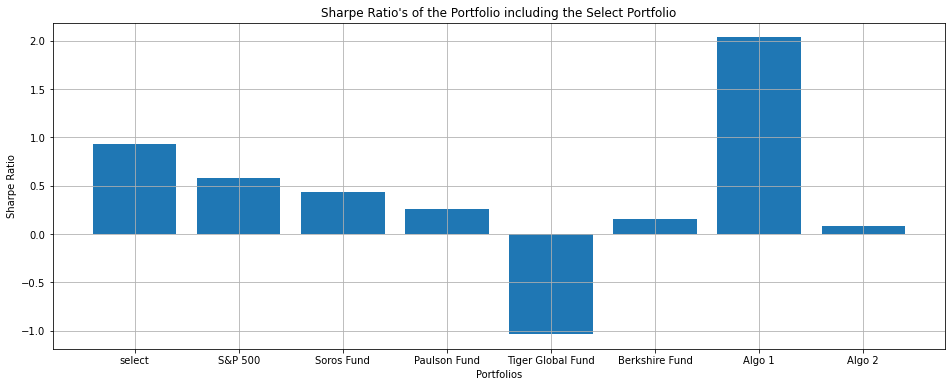

In [42]:
# Visualize the sharpe ratios as a bar plot
select_portfolio = ["select", "S&P 500", "Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Fund", "Algo 1", "Algo 2"]
select_beta = [select_sharpe_ratios[0], select_sharpe_ratios[1], select_sharpe_ratios[2], select_sharpe_ratios[3], select_sharpe_ratios[4], select_sharpe_ratios[5], select_sharpe_ratios[6], select_sharpe_ratios[7]]
        
plt.figure(figsize = (16, 6))
plt.bar(select_portfolio, select_beta)
plt.grid()
plt.xlabel("Portfolios")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio's of the Portfolio including the Select Portfolio")
plt.show()

#### Calculate and Plot cumulative returns for Select + Other Funds.

<AxesSubplot:title={'center':'Cumulative Returns for Select, Whales, Algo Traders, and S&P 500\n'}, xlabel='\nDate', ylabel='Cumulative Returns with the Select Portfolio'>

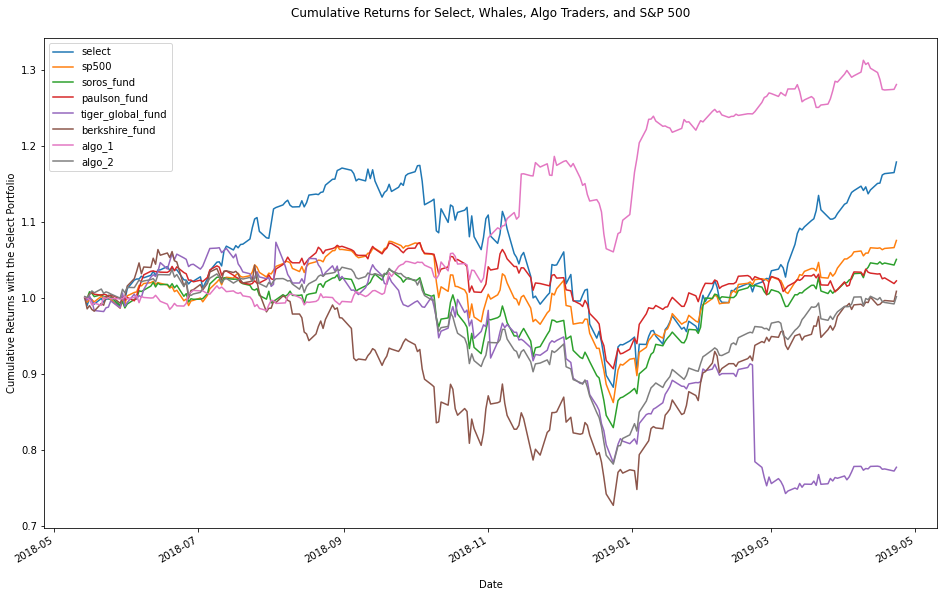

In [43]:
# Calculate cumulative returns of all portfolios
select_cumulative_returns_df = ( 1 + select_combined_returns_df).cumprod()

# Plot cumulative returns
select_cumulative_returns_df.plot(xlabel = "\nDate", ylabel = "Cumulative Returns with the Select Portfolio", figsize = (16,10), title = "Cumulative Returns for Select, Whales, Algo Traders, and S&P 500\n")

### How does your portfolio do?

#### Overall Return
Considering the cumulative returns, Algo 1 Fund is still superior.  The Cumulative Returns graph evidences this. However, the Select Fund has the second-highest returns. S&P 500 is the third in rank. Tiger Global Fund does the worst, with others are providing similar returns. Since these are similar to S&P 500, they may have a dominant portion of funds that makes the S&P 500 during this time range (2018-2019). 

#### Risk Considerations
When looking at the collection of portfolios, most of these seem highly exposed to the market, i.e., bear significant systematic risk.  This is evidenced by lighter shade in the S&P 500 column in the Heat Map and relatively higher values in the S&P 500 column in the Correlation Matrix, which shows a high correlation with S&P 500.  The highest correlation is for Soros Fund (0.88), Algo 2 Fund (0.88), and the Select Fund (0.87), which we have created. The lowest is for Algo 1 Fund (0.29).  When looking at the overall Beta, the highest Beta is for Berkshire Fund (as is the previous case), indicating strong performance in a bull market but likely fair badly in a bear market. Ditto for our Select Fund, which posts the second-highest Beta (overall, Static Beta) as well.
In contrast, Algo 1 Fund shows significant stability compared to the market relative to all others.  Beta for Algo 2 Fund is comparable to that of Soros Fund and Tiger Global Fund. When observing 60-day rolling Beta, it is possible to see confirmation of that, with our Select Fund also having a very high rolling Beta as well.  Algo 1 Fund posts a low rolling Beta value as before. 

#### Overall
Finally, observing the Sharpe Ratio, the Algo 1 Fund again gives the best returns adjusted to risk while our Select Fund comes in second. Tiger Global Fund does the worst in this aspect. The best fund/portfolio overall is the Algo 1 Fund due to its high cumulative returns, low Beta, and high Sharpe Ratio. 

Our Select Fund did very well in second place with second-highest cumulative returns and second-highest Sharpe Ratio. In contrast, our Select Fund did have the second-highest Static Beta (overall), which is a negative.
The worst performers are Algo 1 Fund, Berkshire, and Tiger global (the worst by far) due to low cumulative returns, high Beta, and low Sharpe Ratios.    
